# 1.1 Birth Rates

The data on US births, provided by the CDC is in `data/births.csv`.

Reproduce the following plot of births by gender over time given the data:

![](births_gender.png)

Note the `1e6` on the y axis for scale

/home/jlmy/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/jlmy/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/jlmy/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


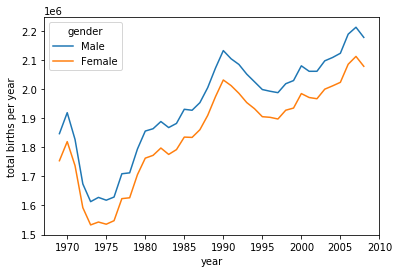

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/births.csv')

grouped = df.groupby(['year', 'gender'], as_index=False).sum()
males = grouped[grouped['gender'] == 'M']
females = grouped[grouped['gender'] == 'F']

ax = plt.subplot(1,1,1)
ax.plot(males.year, males.births, label="Male")
ax.plot(females.year, females.births, label="Female")
ax.legend(title="gender")
plt.xlabel('year')
plt.ylabel('total births per year')
plt.yscale("linear")
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

# 1.2 Births anomalies

This was analyzed by beloved statistician Andrew Gelman [here](http://andrewgelman.com/2012/06/14/cool-ass-signal-processing-using-gaussian-processes/), leading to this plot:

![](births_gp100.png)

Explain all three plots in Gelman's figure. 


**1.2:** What is the periodic component? What is the residual? Use your research skills to learn then explain it (in english).

### Periodic Component
The periodic component is a time series component used to analyse the frequency a given metric during a given period T. This is used to correlate the trend of the metric's measurements with recognizeable patterns (sinusoidal, harmonic, etc.), so as to classify the metric. For example, take [this paper](http://www.cs.cmu.edu/Groups/NIPS/00papers-pub-on-web/SaulAllen.pdf) on analysing voice pitch through periodic analysis of a person's tone, in order to recognize which language is being used by said person.

### Residual
Residuals of a time series are leftover data of modelings applied to the series, and are used as a diagnostic tool to evaluate wheter the modelling excluded and, or, included the right data from its work.
These can be represented as the difference between the observations and the corresponding fitted values of the model:
\begin{equation}
e_{t} = y_{t}-\hat{y}_{t}.
\end{equation}

[source](https://otexts.com/fpp2/residuals.html)

# 1.3 Holiday Anomalies Plot

Reproduce *as best you can* the first of the 3 figures from Andrew Gelman's blog post (your plot may have small differences)

**1.3.1:** Reproduce the births line in a plot. Hint: Make the x axis a `pd.datetime` object

**1.3.2:** Reproduce the `smoothed` line. Hint: use a rolling window average

**1.3.3:** Reproduce the entire figure with the mean line as a horizontal. You can make the y axis total births instead of a % deviation from mean axis (they'll look the same anyway)

#### 1.3.1 Reproduce the births line in a plot. Hint: Make the x axis a `pd.datetime` object

In [43]:
from datetime import datetime, timedelta

import matplotlib.dates as mdates

df['month'] = df['month'].astype(int)
df['year'] = df['year'].astype(int)
df['day'] = df['day'].fillna(1).astype(int)
# We remove all leap days from the data
# We also cleanup day values beyond expected day ranges for given months
df = df[~((df.month == 1) & (df.day > 31))]
df = df[~((df.month == 2) & (df.day > 28))]
df = df[~((df.month == 3) & (df.day > 31))]
df = df[~((df.month == 4) & (df.day > 30))]
df = df[~((df.month == 5) & (df.day > 31))]
df = df[~((df.month == 6) & (df.day > 30))]
df = df[~((df.month == 7) & (df.day > 31))]
df = df[~((df.month == 8) & (df.day > 31))]
df = df[~((df.month == 9) & (df.day > 30))]
df = df[~((df.month == 10) & (df.day > 31))]
df = df[~((df.month == 11) & (df.day > 30))]
df = df[~((df.month == 12) & (df.day > 31))]
df['date'] = df.apply(lambda row: datetime(year=row['year'], month=row['month'], day=row['day']) ,axis=1)
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)

grouped = pd.DataFrame(df.groupby(['month','day']).agg({'births': 'sum'})).reset_index()
grouped['date'] = grouped.apply(lambda row: datetime(year=2000, month=row['month'], day=row['day']), axis=1)
# we filter out outliers
grouped = grouped[grouped['births'] < 300000]
mean = grouped['births'].mean()
grouped['rel'] = (100 - ((mean - grouped['births']) / mean) * 100)


#### Reproduce the smoothed line. Hint: use a rolling window average

In [46]:
# grouped['roll'] = 
grouped['r_births'] = grouped['births'].rolling(window=5, win_type='triang').mean(std=5)
grouped['r_births_rel'] = (100 - ((mean - grouped['r_births']) / mean) * 100)
grouped

,month,day,births,date,rel,r_births,r_births_rel
1,1,2,169896,2000-01-02,87.998765,NaN,NaN
2,1,3,180036,2000-01-03,93.250846,NaN,NaN
3,1,4,182854,2000-01-04,94.710448,NaN,NaN
4,1,5,184145,2000-01-05,95.379130,NaN,NaN
5,1,6,186726,2000-01-06,96.715976,181505.111111,94.011782
...,...,...,...,...,...,...,...
360,12,27,194006,2000-12-27,100.486700,168309.888889,87.177228
361,12,28,201768,2000-12-28,104.507080,176489.888889,91.414114
362,12,29,204806,2000-12-29,106.080632,188313.333333,97.538146
363,12,30,206894,2000-12-30,107.162126,198351.444444,102.737452


#### We make the important date markers

In [71]:
imp_dates = [
#     {'coords': [1,1], 'label': '1 / 1'},
    {'coords': [2,14], 'label': '2 / 14'},
#     {'coords': [2,29], 'label': '2/29*4'},
    {'coords': [7,4], 'label': '7 / 4'},
    {'coords': [9,6], 'label': 'Labor Day'},
    {'coords': [11,25], 'label': 'Thanksgiving'},
    {'coords': [12,24], 'label': '12 / 24'},
    {'coords': [12,25], 'label': '12 / 25'},
    {'coords': [12,30], 'label': '12 / 30'},
]

/home/jlmy/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/jlmy/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/jlmy/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


,month,day,births,date,rel,r_births,r_births_rel
1,1,2,169896,2000-01-02,87.998765,NaN,NaN
2,1,3,180036,2000-01-03,93.250846,NaN,NaN
3,1,4,182854,2000-01-04,94.710448,NaN,NaN
4,1,5,184145,2000-01-05,95.379130,NaN,NaN
5,1,6,186726,2000-01-06,96.715976,181505.111111,94.011782
...,...,...,...,...,...,...,...
360,12,27,194006,2000-12-27,100.486700,168309.888889,87.177228
361,12,28,201768,2000-12-28,104.507080,176489.888889,91.414114
362,12,29,204806,2000-12-29,106.080632,188313.333333,97.538146
363,12,30,206894,2000-12-30,107.162126,198351.444444,102.737452


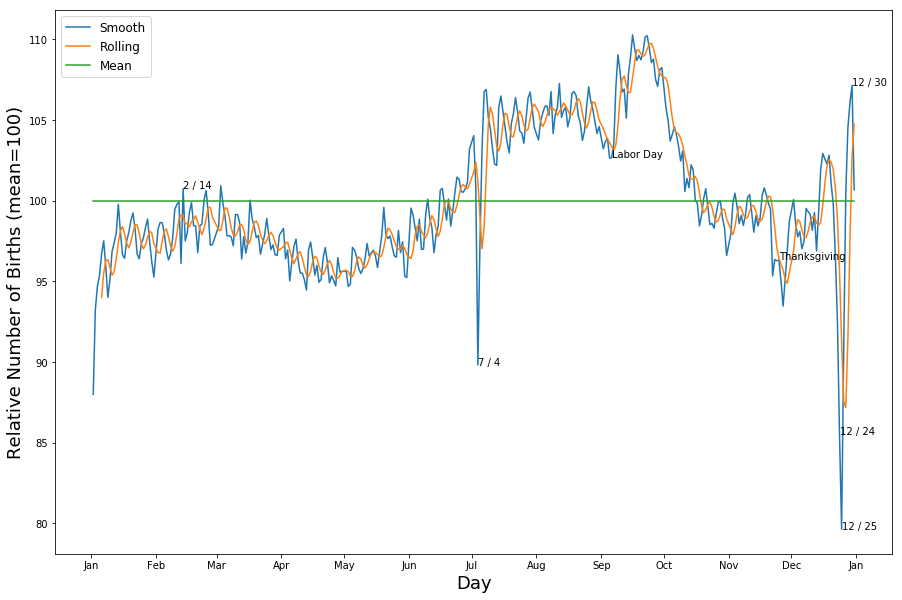

In [80]:
plt.figure(figsize=[15.0,10.0])
ax = plt.subplot(1,1,1)
ax.plot(grouped['date'], grouped['rel'], label="Smooth")
ax.plot(grouped['date'], grouped['r_births_rel'], label="Rolling")
"""
We add the median line
"""
ax.plot(grouped['date'], [100] * grouped['date'].count(), label="Mean")
for day in imp_dates:
    date = day['coords']
    row = grouped.loc[(grouped['month'] == date[0]) & (grouped['day'] == date[1])]
    ax.text(row['date'], row['rel'], day['label'])

# ax = plt.subplot(1,1,1)
ax.set_ylabel('Relative Number of Births (mean=100)',fontsize=18)
ax.set_xlabel('Day',fontsize=18)

locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')
X = plt.gca().xaxis
X.set_major_locator(locator)
X.set_major_formatter(fmt)
plt.legend(fontsize='large', loc='upper left')
grouped

# 2. Recipe Database

### 2.1 

Load the JSON recipe database we saw in lecture 4.

How many of the recipes are for breakfast food? Hint: The `description` would contain the work "breakfast"

In [81]:
import gzip
import numpy as np
from io import StringIO

"""
Had to use IO due to my pandas version having a different process.
See: https://stackoverflow.com/questions/63553845/pandas-read-json-valueerror-protocol-not-known
"""

# read the entire file into a Python array
with gzip.open('data/recipe.json.gz', 'r') as f:
    # Extract each line
    data = (line.strip().decode() for line in f)
    # Reformat so each line is the element of a list
    data_json = f"[ {','.join(data)} ]"

rc = pd.read_json(StringIO(data_json))

### The number of breakfasts is

In [82]:
"""
Check if breakfast
"""
rc.description = rc.description.fillna('')


"""
Convenience method that runs a generator over the words we're looking for
"""
def words_exist_in(field, words):
    return any(v in field for v in words)
    

rc['is_breakfast'] = (rc.description
                        .apply(lambda row: words_exist_in(row, ['breakfast', 'Breakfast', 'BREAKFAST']))
                     )
breakfasts = rc[rc['is_breakfast']]
breakfasts._id.count()

3524

### 2.2 A simple recipe recommender

Let's build a recipe recommender: given a list of basic ingredients, find a recipe that uses all those ingredients.

Here is the list of ingredients that can be asked for:

```
['salt', 'pepper', 'oregano', 'sage', 'parsley',
 'rosemary', 'tarragon', 'thyme', 'paprika', 'cumin']
```

**Hint:** Build a new column for each of the ingredients that indicates whether that ingredient is in the recipe.

**example:**
```
recommend_ingredients(["parsley", "paprika", "tarragon"], df)

result: 
# The rows where these 3 ingredients are in the recipe
[2069, 74964, 93768, 113926, 137686, 140530, 158475, 158486, 163175, 165243]
```

In [83]:
def recommend_ingredients(q, df):
    df2 = pd.DataFrame({
        'ingredients': df['ingredients']
    })
    for ingredient in q:
        df2[ingredient] = df2.ingredients.apply(lambda row: words_exist_in(row, [ingredient]))
        """
        We filter the frame right away, as it's useless to re-run an apply on recipes without 
        the ingredient we just ran the apply for
        """
        df2 = df2[df2[ingredient]]
    return df2.index.tolist()

recommend_ingredients(["parsley", "paprika", "tarragon"], rc)
    

[2069, 74964, 93768, 113926, 137686, 140530, 158475, 158486, 163175, 165243]

# 3. Movies!

Recall the [Movies Dataset](https://www.kaggle.com/rounakbanik/the-movies-dataset) from lecture 4. It's made up of several tables which we've played with in lecture 4.

The tables have common columns (`id` and `movie_id`) around which you can merge and join tables.

### 3.1 best director

Your task is to find **The best director** in terms of average ratings of his movies. This can be from the `ratings` or `ratings_small` table, or simply the vote average in the `metadata` table. The director can be found in the `cast` table.

You will have to use all of your skills to get this done, between using groupbys and merging multiple tables together

In [84]:
"""
From class:
"""
import gzip
import json
movies_url = {
"movies_metadata": "1RLvh6rhzYiDDjPaudDgyS9LmqjbKH-wh",
"keywords": "1YLOIxb-EPC_7QpkmRqkq9E6j7iqmoEh3",
"ratings": "1_5HNurSOMnU0JIcXBJ5mv1NaXCx9oCVG",
"credits": "1bX9othXfLu5NZbVZtIPGV5Hbn8b5URPf",
"ratings_small": "1fCWT69efrj4Oxdm8ZNoTeSahCOy6_u6w",
"links_small": "1fh6pS7XuNgnZk2J3EmYk_9jO_Au_6C15",
"links": "1hWUSMo_GwkfmhehKqs8Rs6mWIauklkbP",
}

def read_gdrive(url):
    """
    Reads file from Google Drive sharing link
    """
    path = 'https://drive.google.com/uc?export=download&id='+url
    return pd.read_csv(path)

def read_zip(url):
    with gzip.open('https://drive.google.com/uc?export=download&id='+url, 'r') as f:
        # Extract each line
        data = (line.strip().decode() for line in f)
        # Reformat so each line is the element of a list
        data_json = f"[{','.join(data)}]"
        # read the result as a JSON
    return pd.read_json(data_json)

mf = read_gdrive(movies_url["movies_metadata"])
"""
File size was throwing a reCaptacha on GDrive for CREDITS, couldn't fetch, so had to upload the file in the notebook.
Must have the file in order for this to work.
"""
ratings = read_gdrive(movies_url["ratings_small"])
mc = pd.read_csv('data/credits.csv')
ratings

/home/jlmy/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2901: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [85]:

test = pd.DataFrame({
    'id': mc.id
})
def remove_x(row):
    v = set([d['name'] if d['job'] == 'Director' else 'x' for d in row])
    v.discard('x')
    return list(v)
test['director'] = (mc.crew
   .apply(eval)
   .apply(remove_x)
)
"""
If you're not using pandas >= 0.25.1 this won't work
"""
print(pd.__version__)
test = test.explode('director')
test2 = test.groupby(['director', 'id']).size().reset_index()
directors = test2.director.value_counts()
test = test[test['director'].isin(directors[directors>8].index)]
test

1.1.5


,id,director
0,862,John Lasseter
1,8844,Joe Johnston
2,15602,Howard Deutch
5,949,Michael Mann
6,11860,Sydney Pollack
...,...,...
45465,67179,Paolo Taviani
45465,67179,Vittorio Taviani
45466,84419,Jean Yarbrough
45470,30840,John Irvin


In [86]:
"""
Let's assume a film needs to have had at least 10 reviews to count

We'll inspire ourselves on on IMDB's movie rating formulae in order to filter out films:

https://help.imdb.com/article/imdb/track-movies-tv/ratings-faq/G67Y87TFYYP6TWAV#

here, let's assume a cut-off of 10 ratings, so, a director needs to have a movie rated 10 times for it to be considered.

with these filtered out films, let's apply a simple score rating equal to:
score (for director) = (average of all ratings of all films for director) * sum of all counts of ratings

This way, we can reward directors for both high ratings, and for having many ratings (idication a their films were watched often)

"""

dirs = pd.DataFrame({
    'directors': test.director.unique()
})
    
def pop_dirs(director): 
    ids = test[test['director'] == director]['id'].unique()
    if len(ids) < 8: return 0.0
    check = pd.DataFrame({
        'ids': ids
    })
    ratings_c = ratings[ratings['movieId'].isin(ids)]
    def filter_movie(row):
        filtered = ratings_c[ratings_c['movieId'] == row]
        rating = filtered['rating']
        return pd.Series({
            'rating': rating.mean(),
            'count': float(len(rating))
        })
    check = check.merge(check.ids.apply(filter_movie), left_index=True, right_index=True)
    if 'count' in check:
        filtered2 = check[check['count'] >= 10.]
        mult = filtered2['count'].sum() * filtered2['rating'].mean()
        return mult#num / denum
    else:
        return 0.0

dirs['score'] = dirs.directors.apply(pop_dirs)
dirs = dirs.sort_values('score',ascending=False)

In [87]:
dirs.nlargest(35, 'score')

,directors,score
267,Alfred Hitchcock,3967.415693
118,Tim Burton,1696.022318
353,Andrei Tarkovsky,1658.322368
349,Wim Wenders,1479.412880
111,Barry Levinson,1463.765524
244,Stanley Kubrick,1456.548261
191,Steven Spielberg,1072.203380
137,Lee Tamahori,1050.000000
454,Ishirô Honda,1026.089734
140,Mira Nair,1015.500000
